# Automating Reviews in Medicine

<img src="images/medical.jpg"/>

The medical literature is enormous. Pubmed, a database of medical publications maintained by the U.S. National Library of Medicine, has indexed over 23 million medical publications. Further, the rate of medical publication has increased over time, and now there are nearly 1 million new publications in the field each year, or more than one per minute.

The large size and fast-changing nature of the medical literature has increased the need for reviews, which search databases like Pubmed for papers on a particular topic and then report results from the papers found. While such reviews are often performed manually, with multiple people reviewing each search result, this is tedious and time consuming. In this problem, we will see how text analytics can be used to automate the process of information retrieval.

The dataset consists of the titles (variable title) and abstracts (variable abstract) of papers retrieved in a Pubmed search. Each search result is labeled with whether the paper is a clinical trial testing a drug therapy for cancer (variable trial). These labels were obtained by two people reviewing each search result and accessing the actual paper if necessary, as part of a literature review of clinical trials testing drug therapies for advanced and metastatic breast cancer.

## Problem 1.1 - Loading the Data
Load clinical_trial.csv into a data frame called trials (remembering to add the argument stringsAsFactors=FALSE), and investigate the data frame with summary() and str().

IMPORTANT NOTE: Some students have been getting errors like "invalid multibyte string" when performing certain parts of this homework question. If this is happening to you, use the argument fileEncoding="latin1" when reading in the file with read.csv. This should cause those errors to go away.

We can use R's string functions to learn more about the titles and abstracts of the located papers. The nchar() function counts the number of characters in a piece of text. Using the nchar() function on the variables in the data frame, answer the following questions:

**How many characters are there in the longest abstract?** (Longest here is defined as the abstract with the largest number of characters.)

In [1]:
# Load the dataset
trials = read.csv("data/clinical_trial.csv", stringsAsFactors=FALSE)

head(trials,3)

,title,abstract,trial
,<chr>,<chr>,<int>
1,"Treatment of Hodgkin's disease and other cancers with 1,3-bis(2-chloroethyl)-1-nitrosourea (BCNU; NSC-409962).",,1
2,Cell mediated immune status in malignancy--pretherapy and post-therapy assessment.,"Twenty-eight cases of malignancies of different kinds were studied to assess T-cell activity and population before and after institution of therapy. Fifteen cases were diagnosed as non-metastasising squamous cell carcinoma of larynx, pharynx, laryngopharynx, hypopharynx and tonsils. Seven cases were non-metastasising infiltrating duct carcinoma of breast and 6 cases were non-Hodgkin's lymphoma (NHL). It was observed that 3 out of 15 cases (20%) of squamous cell carcinoma cases were Mantoux test (MT) negative with a T-cell population of less than 40%, 2 out of 7 cases (28.6%) of infiltrating duct carcinoma of breast were MT negative with a T-cell population of less than 40% and 3 out of 6 cases (50%) of NHL were MT negative with a T-cell population of less than 40%. The normal controls, consisting of apparently normal healthy adults, had a T-cell population of more than 40% and were all MT positive. The patients who showed a negative skin test and a T-cell population less than 40% were further subjected to assessment of T-cell population and activity after appropriate therapy, and clinical cure of the disease. It was observed that 2 out of 3 cases (66.66%) of squamous cell carcinomas, 2 out of 2 cases (100%) of adenocarcinomas and one out of 3 cases (33.33%) of NHL showed positive conversion with a T-cell population of more than 40%.",0
3,Neoadjuvant vinorelbine-capecitabine versus docetaxel-doxorubicin-cyclophosphamide in early nonresponsive breast cancer: phase III randomized GeparTrio trial.,"BACKGROUND: Among breast cancer patients, nonresponse to initial neoadjuvant chemotherapy is associated with unfavorable outcome. We compared the response of nonresponding patients who continued the same treatment with that of patients who switched to a well-tolerated non-cross-resistant regimen. METHODS: Previously untreated breast cancer patients received two 3-week cycles of docetaxel at 75 mg/m(2), doxorubicin at 50 mg/m(2), and cyclophosphamide at 500 mg/m(2) per day (TAC). Patients whose tumors did not decrease in size by at least 50% were randomly assigned to four additional cycles of TAC or to four cycles of vinorelbine at 25 mg/m(2) and capecitabine at 2000 mg/m(2) (NX). The outcome was sonographic response, defined as a reduction in the product of the two largest perpendicular diameters by at least 50%. A difference of 10% or less in the sonographic response qualified as noninferiority of the NX treatment. Pathological complete response was defined as no invasive or in situ residual tumor masses in the breast and lymph nodes. Toxic effects were assessed. All statistical tests were two-sided. RESULTS: Of 2090 patients enrolled in the GeparTrio study, 622 (29.8%) who did not respond to two initial cycles of TAC were randomly assigned to an additional four cycles of TAC (n = 321) or to four cycles of NX (n = 301). Sonographic response rate was 50.5% for the TAC arm and 51.2% for the NX arm. The difference of 0.7% (95% confidence interval = -7.1% to 8.5%) demonstrated noninferiority of NX (P = .008). Similar numbers of patients in both arms received breast-conserving surgery (184 [57.3%] in the TAC arm vs 180 [59.8%] in the NX arm) and had a pathological complete response (5.3% vs 6.0%). Fewer patients in the NX arm than in the TAC arm had hematologic toxic effects, mucositis, infections, and nail changes, but more had hand-foot syndrome and sensory neuropathy. CONCLUSION: Pathological complete responses to both regimens were marginal. Among patients who did not respond to the initial neoadjuvant TAC treatment, similar efficacy but better tolerability was observed by switching to NX than continuing with TAC.",1


In [2]:
# Outputs the longest abstract
max(nchar(trials$abstract))

[1] 3708

### Problem 1.2 - Loading the Data
**How many search results provided no abstract?** (HINT: A search result provided no abstract if the number of characters in the abstract field is zero.)

In [3]:
# Tabulates the amount of results with no abstracts
abs = table(nchar(trials$abstract)==0)
abs


FALSE  TRUE 
 1748   112 

Answer: 112 search results have no abstract.

### Problem 1.3 - Loading the Data
Find the observation with the minimum number of characters in the title (the variable "title") out of all of the observations in this dataset. **What is the text of the title of this article?** Include capitalization and punctuation in your response, but don't include the quotes.

In [4]:
# Find the observation with the minimum number of characters
which.min(nchar(trials$title))

[1] 1258

In [5]:
num = which.min(nchar(trials$title))

pos = trials$title[num]
pos

[1] "A decade of letrozole: FACE."

### Problem 2.1 - Preparing the Corpus
Because we have both title and abstract information for trials, we need to build two corpera instead of one. Name them corpusTitle and corpusAbstract.

Following the commands from lecture, perform the following tasks (you might need to load the "tm" package first if it isn't already loaded). Make sure to perform them in this order.

1) Convert the title variable to corpusTitle and the abstract variable to corpusAbstract.

2) Convert corpusTitle and corpusAbstract to lowercase. After performing this step, remember to run the lines:

    corpusTitle = tm_map(corpusTitle, PlainTextDocument)

    corpusAbstract = tm_map(corpusAbstract, PlainTextDocument)

3) Remove the punctuation in corpusTitle and corpusAbstract.

4) Remove the English language stop words from corpusTitle and corpusAbstract.

5) Stem the words in corpusTitle and corpusAbstract (each stemming might take a few minutes).

6) Build a document term matrix called dtmTitle from corpusTitle and dtmAbstract from corpusAbstract.

7) Limit dtmTitle and dtmAbstract to terms with sparseness of at most 95% (aka terms that appear in at least 5% of documents).

8) Convert dtmTitle and dtmAbstract to data frames (keep the names dtmTitle and dtmAbstract).

If the code length(stopwords("english")) does not return 174 for you, then please run the line of code in this file, which will store the standard stop words in a variable called sw. When removing stop words, use tm_map(corpusTitle, removeWords, sw) and tm_map(corpusAbstract, removeWords, sw) instead of tm_map(corpusTitle, removeWords, stopwords("english")) and tm_map(corpusAbstract, removeWords, stopwords("english")).

**How many terms remain in dtmTitle after removing sparse terms (aka how many columns does it have)?**

In [6]:
# Creating the Corpus
library(tm)

Loading required package: NLP



In [7]:
# Convert the title variable to corpusTitle and the abstract variable to corpusAbstract
corpusTitle = VCorpus(VectorSource(trials$title))

# Convert corpusTitle and corpusAbstract to lowercase
corpusTitle = tm_map(corpusTitle, content_transformer(tolower))

# Remove the punctuation in corpusTitle and corpusAbstract
corpusTitle = tm_map(corpusTitle, removePunctuation)

# Remove the English language stop words from corpusTitle and corpusAbstract
corpusTitle = tm_map(corpusTitle, removeWords, stopwords("english"))

# Stem the words in corpusTitle and corpusAbstract (each stemming might take a few minutes)
corpusTitle = tm_map(corpusTitle, stemDocument)

In [8]:
# Limit dtmTitle and dtmAbstract to terms with sparseness of at most 95% (aka terms that appear in at least 5% of documents)
dtmTitle = DocumentTermMatrix(corpusTitle)

In [9]:
# Remove sparse terms
dtmTitle = removeSparseTerms(dtmTitle, 0.95)

dtmTitle = as.data.frame(as.matrix(dtmTitle))

colnames(dtmTitle) = make.names(colnames(dtmTitle))

ncol(dtmTitle)

[1] 31

**How many terms remain in dtmAbstract?**

In [10]:
# Convert the title variable to corpusTitle and the abstract variable to corpusAbstract
corpusAbstract = VCorpus(VectorSource(trials$abstract))

# Convert corpusTitle and corpusAbstract to lowercase
corpusAbstract = tm_map(corpusAbstract, content_transformer(tolower))

# Remove the punctuation in corpusTitle and corpusAbstract
corpusAbstract = tm_map(corpusAbstract, removePunctuation)

# Remove the English language stop words from corpusTitle and corpusAbstract
corpusAbstract = tm_map(corpusAbstract, removeWords, stopwords("english"))

# Stem the words in corpusTitle and corpusAbstract (each stemming might take a few minutes)
corpusAbstract = tm_map(corpusAbstract, stemDocument)

In [11]:
# Limit dtmTitle and dtmAbstract to terms with sparseness of at most 95% (aka terms that appear in at least 5% of documents)
dtmAbstract = DocumentTermMatrix(corpusAbstract)

In [12]:
# Remove the sparse terms
dtmAbstract = removeSparseTerms(dtmAbstract, 0.95)

dtmAbstract = as.data.frame(as.matrix(dtmAbstract))

colnames(dtmAbstract) = make.names(colnames(dtmAbstract))

ncol(dtmAbstract)

[1] 335

Answer: 31 terms remain in dtmTitle and 335 terms remain in dtmAbstract.

### Problem 2.2 - Preparing the Corpus
**What is the most likely reason why dtmAbstract has so many more terms than dtmTitle?**

Answer: Because the number of words found in the abstract is generally greater in words than in the titles of articles.

### Problem 2.3 - Preparing the Corpus
**What is the most frequent word stem across all the abstracts?** Hint: you can use colSums() to compute the frequency of a word across all the abstracts.

In [13]:
# Obtain the frequency of word stems
frequency <- colSums(dtmAbstract)

which.max(frequency)

patient 
    212

Answer: "Patient" is the most frequent word stem across all abstracts.

### Problem 3.1 - Building a model
We want to combine dtmTitle and dtmAbstract into a single data frame to make predictions. However, some of the variables in these data frames have the same names. To fix this issue, run the following commands:

    colnames(dtmTitle) = paste0("T", colnames(dtmTitle))

    colnames(dtmAbstract) = paste0("A", colnames(dtmAbstract))

**What was the effect of these functions?**

In [14]:
# Input T into Title and A into Abstracts

colnames(dtmTitle) = paste0("T", colnames(dtmTitle))

colnames(dtmAbstract) = paste0("A", colnames(dtmAbstract))

Answer: Input T into Title and A into Abstracts

### Problem 3.2 - Building a Model
Using cbind(), combine dtmTitle and dtmAbstract into a single data frame called dtm:

    dtm = cbind(dtmTitle, dtmAbstract)

As we did in class, add the dependent variable "trial" to dtm, copying it from the original data frame called trials. **How many columns are in this combined data frame?**

In [15]:
# Combine the data frame

dtm = cbind(dtmTitle, dtmAbstract)

ncol(dtm)

[1] 366

In [16]:
# Remove dependent variable
dtm$trial = trials$trial

Answer: 367 columns are in the combined data frame.

### Problem 3.3 - Building a Model
Now that we have prepared our data frame, it's time to split it into a training and testing set and to build regression models. Set the random seed to 144 and use the sample.split function from the caTools package to split dtm into data frames named "train" and "test", putting 70% of the data in the training set.

**What is the accuracy of the baseline model on the training set?** (Remember that the baseline model predicts the most frequent outcome in the training set for all observations.)

In [17]:
library(caTools)

In [18]:
# Split the dataset into training and testing sets

set.seed(144)

spl = sample.split(dtm$trial, SplitRatio = 0.7)

train = subset(dtm, spl==TRUE)
test = subset(dtm, spl==FALSE)

In [19]:
# Tabulate the baseline model

Bl = table(dtm$trial)
Bl


   0    1 
1043  817 

In [20]:
accurBl = max(Bl)/sum(Bl)
paste("Accuracy Baseline:", round(accurBl,digits=4))

[1] "Accuracy Baseline: 0.5608"

### Problem 3.4 - Building a Model
Build a CART model called trialCART, using all the independent variables in the training set to train the model, and then plot the CART model. Just use the default parameters to build the model (don't add a minbucket or cp value). Remember to add the method="class" argument, since this is a classification problem.

**What is the name of the first variable the model split on?**

In [21]:
library(rpart)
library(rpart.plot)

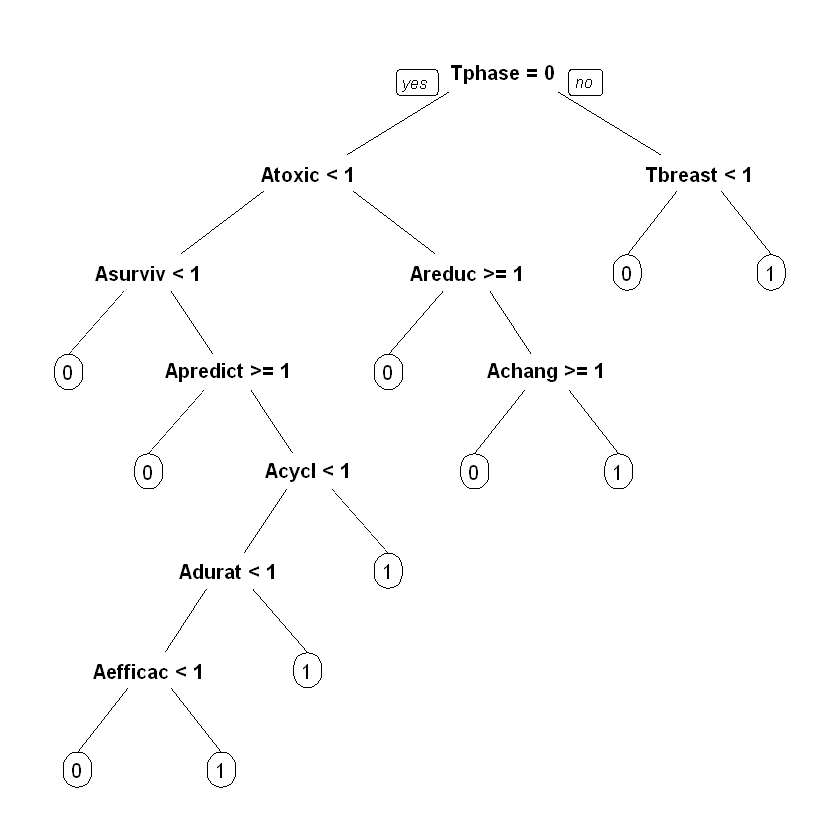

In [22]:
# Classification and Regression Trees (CART)
trialCART = rpart(trial  ~ ., data=train, method="class")

# Plot Trees
prp(trialCART)

Answer: The first variable is Tphase.

### Problem 3.5 - Building a Model
Obtain the training set predictions for the model (do not yet predict on the test set). Extract the predicted probability of a result being a trial (recall that this involves not setting a type argument, and keeping only the second column of the predict output). **What is the maximum predicted probability for any result?**

In [23]:
# CART Model #1 - Training(MAX)

# Predicting on the raining set
predTrain <- predict(trialCART)

summary(predTrain)

       0                1          
 Min.   :0.1281   Min.   :0.05455  
 1st Qu.:0.2177   1st Qu.:0.13636  
 Median :0.7125   Median :0.28750  
 Mean   :0.5607   Mean   :0.43932  
 3rd Qu.:0.8636   3rd Qu.:0.78231  
 Max.   :0.9455   Max.   :0.87189  

Answer: The maximum predicted probability is 0.872

### Problem 3.6 - Building a Model
**Without running the analysis, how do you expect the maximum predicted probability to differ in the testing set?**

Answer: Not so much different.

### Problem 3.7 - Building a Model
For these questions, use a threshold probability of 0.5 to predict that an observation is a clinical trial.

**What is the training set accuracy of the CART model?**

In [24]:
# CART Model #1 - Training

# Confusion Matrix CART model
cmCA = table(train$trial, predTrain[,2]>=0.5)
cmCA

   
    FALSE TRUE
  0   631   99
  1   131  441

The rows are labeled with the actual outcome, and the columns are labeled with the predicted outcome.

                      Predict 0       Predict 1
        Actual 0    True Negative   False Positive
        Actual 1    False Negative  True Positive

        cmCA = [1][3]
               [2][4]

In [25]:
# Compute Classification and Regression Trees Accuracy
accurCA = sum(diag(cmCA))/sum(cmCA)
paste("Accuracy CART:", round(accurCA,digits=4))

[1] "Accuracy CART: 0.8233"

**What is the training set sensitivity of the CART model?**

In [26]:
# Compute Classification and Regression Trees Sensitivity
# Sensitivity: TP/(TP+FN)

sensiCA = cmCA[4]/(cmCA[4]+cmCA[2])
paste("Sensitivity CART:", round(sensiCA,digits=4))

[1] "Sensitivity CART: 0.771"

**What is the training set specificity of the CART model?**

In [27]:
# Compute Classification and Regression Trees Specificity
# Specificity: TN/(TN+FP)

speciCA = cmCA[1]/(cmCA[1]+cmCA[3])
paste("Specificity CART:", round(speciCA,digits=4))

[1] "Specificity CART: 0.8644"

### Problem 4.1 - Evaluating the model on the testing set
Evaluate the CART model on the testing set using the predict function and creating a vector of predicted probabilities predTest.

**What is the testing set accuracy, assuming a probability threshold of 0.5 for predicting that a result is a clinical trial?**

In [28]:
# CART Model #1 - Test

# Predicting on the test set
testPredictCART = predict(trialCART, newdata=test, type="class")

# Tabulating the accuracy of the testpredic vs the testing set
cmTest = table(test$trial, testPredictCART)
cmTest

   testPredictCART
      0   1
  0 261  52
  1  83 162

In [29]:
# Compute Classification and Regression Trees Accuracy
accurTest = sum(diag(cmTest))/sum(cmTest)
paste("Accuracy Testing Set:", round(accurTest,digits=4))

[1] "Accuracy Testing Set: 0.7581"

### Problem 4.2 - Evaluating the Model on the Testing Set
**Using the ROCR package, what is the testing set AUC of the prediction model?**

In [30]:
library(ROCR)

In [31]:
# Relative Operating Characteristic curve (ROC)

predTest = predict(trialCART, newdata=test)[,2]
predROCR = prediction(predTest, test$trial)

# Area Under the ROC Curve (AUC)
AUC = as.numeric(performance(predROCR, "auc")@y.values)

paste("AUC CART:", round(AUC,digits=4))

[1] "AUC CART: 0.8371"

###  Part 5: decision-maker tradeoffs
The decision maker for this problem, a researcher performing a review of the medical literature, would use a model (like the CART one we built here) in the following workflow:

1) For all of the papers retreived in the PubMed Search, predict which papers are clinical trials using the model. This yields some initial Set A of papers predicted to be trials, and some Set B of papers predicted not to be trials. (See the figure below.)

2) Then, the decision maker manually reviews all papers in Set A, verifying that each paper meets the study's detailed inclusion criteria (for the purposes of this analysis, we assume this manual review is 100% accurate at identifying whether a paper in Set A is relevant to the study). This yields a more limited set of papers to be included in the study, which would ideally be all papers in the medical literature meeting the detailed inclusion criteria for the study.

3) Perform the study-specific analysis, using data extracted from the limited set of papers identified in step 2.

This process is shown in the figure below.

<img src="images/papers.png"/>

### Problem 5.1 - Decision-Maker Tradeoffs
**What is the cost associated with the model in Step 1 making a false negative prediction?**

Answer: By definition, a false negative is a paper that should have been included in Set A but was missed by the model. This means a study that should have been included in Step 3 was missed, affecting the results.

### Problem 5.2 - Decision-Maker Tradeoffs
**What is the cost associated with the model in Step 1 making a false positive prediction?**

Answer: By definition, a false positive is a paper that should not have been included in Set A but that was actually included. However, because the manual review in Step 2 is assumed to be 100% effective, this extra paper will not make it into the more limited set of papers, and therefore this mistake will not affect the analysis in Step 3.

### Problem 5.3 - Decision-Maker Tradeoffs
**Given the costs associated with false positives and false negatives, which of the following is most accurate?**

Answer: A false negative might negatively affect the results of the literature review and analysis, while a false positive is a nuisance (one additional paper that needs to be manually checked). As a result, the cost of a false negative is much higher than the cost of a false positive, so much so that many studies actually use no machine learning (aka no Step 1) and have two people manually review each search result in Step 2. As always, we prefer a lower threshold in cases where false negatives are more costly than false positives, since we will make fewer negative predictions.